<a href="https://colab.research.google.com/github/JulioHenri/Trabalho-de-conclusao-de-curso/blob/main/explorando_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando libs

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Carregando e lendo o dataset

In [ ]:
df = pd.read_excel('kids_10_19.xlsx')
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,MUNIC_RES,NASC,SEXO,MARCA_UTI,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,RACA_COR,years_old,Grupo,Grupo_Nome,Grupon,ICSAP,CODMUNNEW,NOME_MUNIC,ID_RM,CODMESO,MESORREGIAO,MESO
0,150000,2010,3,7,150010,20080721,3,0,0,4,4,317.4,39.5,356.9,0.0,207.50,20100110.0,20100114.0,A049,NaN,150010.0,4.0,1.0,4.0,0.0,3.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
1,150000,2010,3,7,150010,20090204,1,0,0,5,5,325.4,39.5,364.9,0.0,212.15,20100107.0,20100112.0,A049,NaN,150010.0,3.0,11.0,5.0,0.0,99.0,1,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
2,150000,2010,3,7,150010,20080814,1,0,0,4,4,317.4,39.5,356.9,0.0,207.50,20100131.0,20100204.0,A049,NaN,150010.0,4.0,1.0,4.0,0.0,99.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
3,150000,2010,5,7,150010,20081027,3,0,0,5,5,325.4,39.5,364.9,0.0,202.72,20100326.0,20100331.0,A049,NaN,150010.0,4.0,1.0,5.0,0.0,99.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
4,150000,2010,6,7,150010,20090804,3,0,0,4,4,317.4,39.5,356.9,0.0,203.94,20100307.0,20100311.0,A049,NaN,150010.0,3.0,7.0,4.0,0.0,3.0,1,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29844 entries, 0 to 29843
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UF_ZI        29844 non-null  int64  
 1   ANO_CMPT     29844 non-null  int64  
 2   MES_CMPT     29844 non-null  int64  
 3   ESPEC        29844 non-null  int64  
 4   MUNIC_RES    29844 non-null  int64  
 5   NASC         29844 non-null  int64  
 6   SEXO         29844 non-null  int64  
 7   MARCA_UTI    29844 non-null  int64  
 8   UTI_INT_TO   29844 non-null  int64  
 9   DIAR_ACOM    29844 non-null  int64  
 10  QT_DIARIAS   29844 non-null  int64  
 11  VAL_SH       29844 non-null  float64
 12  VAL_SP       29844 non-null  float64
 13  VAL_TOT      29843 non-null  float64
 14  VAL_UTI      29843 non-null  float64
 15  US_TOT       29843 non-null  float64
 16  DT_INTER     29843 non-null  float64
 17  DT_SAIDA     29843 non-null  float64
 18  DIAG_PRINC   29843 non-null  object 
 19  DIAG

Por meio da função ".info()" já podemos obter várias informações a respeito do Dataset. Ele nos mostra a quantidade de valores não nulos de cada coluna, os tipos das colunas e o total de linhas e colunas (29844 e 37, respectivamente).

As colunas que mais chamam atenção são DIAG_SECUN, Grupo, Grupo_Nome, ID_RM pela quantidade de valores nulos.

In [ ]:
df.describe()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,MUNIC_RES,NASC,SEXO,MARCA_UTI,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,RACA_COR,years_old,Grupon,ICSAP,CODMUNNEW,CODMESO,MESO
count,29844.0,29844.000000,29844.000000,29844.000000,29844.000000,2.984400e+04,29844.000000,29844.000000,29844.000000,29844.000000,29844.000000,29844.000000,29844.000000,29843.000000,29843.000000,29843.000000,2.984300e+04,2.984300e+04,29843.000000,29843.000000,29843.000000,29843.000000,29843.000000,29843.000000,29844.000000,29844.000000,29844.000000,2.984400e+04,29844.00000,29844.000000
mean,150000.0,2013.062425,6.560783,6.299457,150369.594391,2.011224e+07,1.910669,5.554785,0.401086,2.794733,3.581490,855.115927,173.782294,1028.890281,419.330752,394.991426,2.013119e+07,2.013128e+07,150342.332071,3.524545,3.435580,4.801964,0.016419,37.365714,1.906011,3.157486,0.498526,1.503701e+06,1503.95185,3.904771
std,0.0,4.264269,3.426808,1.780943,250.900752,4.736426e+04,0.996019,20.295813,2.298029,3.853822,4.374338,2126.105156,501.609144,2559.460299,2138.414210,980.509685,4.263235e+04,4.266726e+04,242.707032,0.706864,3.537125,6.385919,0.127083,46.061994,1.547031,3.421832,0.500006,2.508947e+03,1.47587,1.424852
min,150000.0,2010.000000,1.000000,1.000000,150010.000000,2.005010e+07,1.000000,0.000000,0.000000,0.000000,0.000000,30.470000,8.150000,40.380000,0.000000,9.100000,2.009103e+07,2.010010e+07,150010.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.500107e+06,1501.00000,1.000000
25%,150000.0,2010.000000,4.000000,7.000000,150150.000000,2.008032e+07,1.000000,0.000000,0.000000,1.000000,2.000000,293.400000,39.500000,337.240000,0.000000,149.640000,2.010051e+07,2.010051e+07,150140.000000,3.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.501501e+06,1503.00000,3.000000
50%,150000.0,2010.000000,7.000000,7.000000,150330.000000,2.009081e+07,1.000000,0.000000,0.000000,2.000000,3.000000,317.400000,39.500000,376.070000,0.000000,202.840000,2.010092e+07,2.010092e+07,150295.000000,4.000000,2.000000,3.000000,0.000000,3.000000,2.000000,1.000000,0.000000,1.503309e+06,1504.00000,4.000000
75%,150000.0,2019.000000,10.000000,7.000000,150618.000000,2.016112e+07,3.000000,0.000000,0.000000,3.000000,4.000000,528.070000,78.350000,606.420000,0.000000,332.810000,2.019041e+07,2.019042e+07,150580.000000,4.000000,4.000000,4.000000,0.000000,99.000000,3.000000,3.000000,1.000000,1.506187e+06,1505.00000,5.000000
max,150000.0,2019.000000,12.000000,7.000000,150840.000000,2.019123e+07,3.000000,81.000000,54.000000,120.000000,154.000000,50384.880000,16985.010000,58505.510000,56488.960000,34415.000000,2.019123e+07,2.019123e+07,150835.000000,4.000000,30.000000,154.000000,1.000000,99.000000,5.000000,19.000000,1.000000,1.508407e+06,1506.00000,6.000000


#EDA

In [ ]:
df.UF_ZI.unique() #essa coluna não varia, logo, não é necessária para a modelagem, posteriormente

array([150000])

In [ ]:
df = df.drop(['UF_ZI', 'MUNIC_RES','NASC','MARCA_UTI','MUNIC_MOV','COD_IDADE',
             'IDADE','Grupon','ID_RM','CODMESO'], axis=1) #excluindo variáveis desnecessárias

In [ ]:
df.loc[df['DT_INTER'].isna()] #Contém valores nulos em várias colunas


,ANO_CMPT,MES_CMPT,ESPEC,SEXO,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,DIAS_PERM,MORTE,RACA_COR,years_old,Grupo,Grupo_Nome,ICSAP,CODMUNNEW,NOME_MUNIC,MESORREGIAO,MESO
23192,2019,7,7,1,7,0,0,720.66,764.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,1501709,Bragança,Nordeste Paraense,4


In [ ]:
df = df.drop(23192)

In [ ]:
df.Grupo_Nome.unique()

array(['Gastroenterites Infecciosas e complicações', nan, 'Asma',
       'Infecção no Rim e Trato Urinário',
       'Doença Inflamatória órgãos pélvicos femininos',
       'Infecções de ouvido, nariz e garganta', 'Pneumonias bacterianas',
       'Doencas pulmonares',
       'Doenças preveníveis por imunização e condições sensíveis',
       'Infecção da pele e tecido subcutâneo',
       'Doenças relacionadas ao Pré-Natal e Parto',
       'Deficiências Nutricionais', 'Eplepsias',
       'Úlcera gastrointestinal', 'Anemia', 'Diabetes melitus',
       'Insuficiência Cardíaca', 'Hipertensão',
       'Doenças Cerebrovasculares'], dtype=object)

In [ ]:
df.SEXO.value_counts()

1    16254
3    13589
Name: SEXO, dtype: int64

In [ ]:
df.groupby(by=['SEXO','MESORREGIAO'])['Grupo'].count()

SEXO  MESORREGIAO           
1     Baixo Amazonas             755
      Marajó                     591
      Metropolitana de Belém    1338
      Nordeste Paraense         2724
      Sudeste Paraense          1485
      Sudoeste Paraense          946
3     Baixo Amazonas             658
      Marajó                     541
      Metropolitana de Belém    1186
      Nordeste Paraense         2392
      Sudeste Paraense          1365
      Sudoeste Paraense          897
Name: Grupo, dtype: int64

Quantidade de internações por mesorregião do Estado do Pará

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


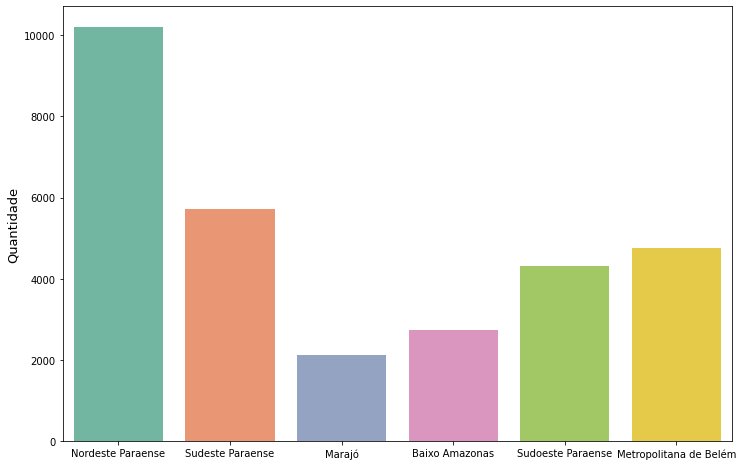

In [ ]:
ax = sns.countplot(df.MESORREGIAO, palette="Set2")
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax

Relação de doenças causadas por condições sensíveis e doenças por outras condições com a idade da criança internada

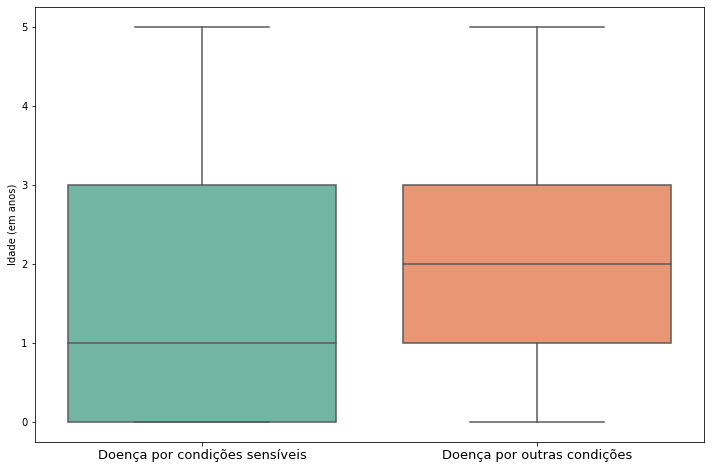

In [ ]:
ax = sns.boxplot(x='ICSAP', y='years_old', data=df, palette="Set2")
ax.figure.set_size_inches(12,8)
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Doença por condições sensíveis','Doença por outras condições'], fontsize=13)
ax

Distribuição de gênero das crianças internadas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


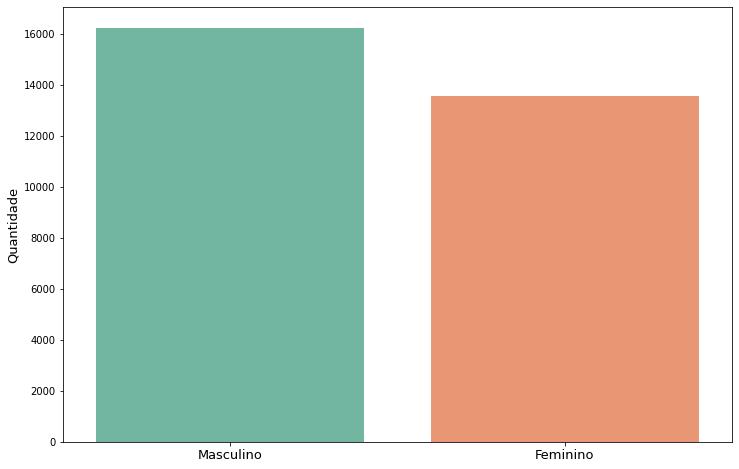

In [ ]:
ax = sns.countplot(df.SEXO, palette="Set2")
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Masculino','Feminino'], fontsize=13)
ax

In [ ]:
df['MORTE'].value_counts() #irei deixar todos os valores no mesmo tipo (numérico)

0.0    29353
1.0      490
Name: MORTE, dtype: int64

In [ ]:
df['MORTE'] = df['MORTE'].replace('#NULO!',0) #substituindo o valor nulo pela moda

In [ ]:
df['MORTE'] = df['MORTE'].replace('0',0) #substituindo as strings por valores numericos
df['MORTE'] = df['MORTE'].replace('1',1) #substituindo 

In [ ]:
df['MORTE'].value_counts()

0.0    29353
1.0      490
Name: MORTE, dtype: int64

Box-plots das crianças que foram e não foram a óbito, divido por quem foi hospitalizado por condições sensíveis e por outras condições. 

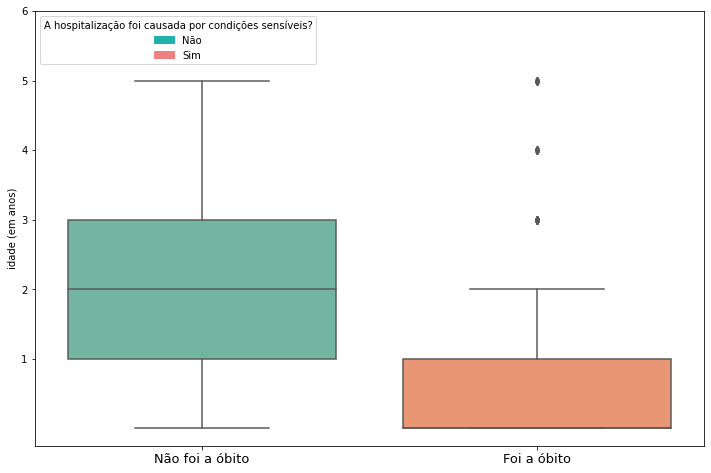

In [ ]:
ax = sns.boxplot(x='MORTE', y='years_old', data=df, palette="Set2")
ax.figure.set_size_inches(12,8)
ax.set_ylabel('idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Não foi a óbito','Foi a óbito'], fontsize=13)
plt.yticks(range(1, 7)) # mudar escala do eixo y

import matplotlib.patches as mpatches
green = mpatches.Patch(color='lightseagreen', label='Não')
pink = mpatches.Patch(color='lightcoral', label='Sim')
plt.legend(title='A hospitalização foi causada por condições sensíveis?', loc='upper left', handles = [green, pink])
ax

In [ ]:
df.groupby(by=['ANO_CMPT','MESORREGIAO','ICSAP'])['ICSAP'].count()

ANO_CMPT  MESORREGIAO             ICSAP
2010      Baixo Amazonas          0.0       882
                                  1.0      1145
          Marajó                  0.0       405
                                  1.0       729
          Metropolitana de Belém  0.0       718
                                  1.0      1756
          Nordeste Paraense       0.0      2645
                                  1.0      3914
          Sudeste Paraense        0.0      1594
                                  1.0      2529
          Sudoeste Paraense       0.0      1773
                                  1.0      1599
2019      Baixo Amazonas          0.0       444
                                  1.0       268
          Marajó                  0.0       577
                                  1.0       403
          Metropolitana de Belém  0.0      1514
                                  1.0       768
          Nordeste Paraense       0.0      2432
                                  1.0      1202
